# Image classification using CNN

## Introduction
The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class.

![](c.png)

## Project Goal
 Our goal for this project is to classify images from CIFAR10 dataset with CNN. And we will also compare accuracy of ANN model and CNN model.

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(train_X,train_y),(test_X,test_y)=datasets.cifar10.load_data()

A local file was found, but it seems to be incomplete or outdated because the auto file hash does not match the original value of 6d958be074577803d12ecdefd02955f39262c83c16fe9348329d7fe0b5c001ce so we will re-download the data.
170500096/170498071 [==============================] - 346s 2us/step


In [3]:
#Training set 
train_X.shape

(50000, 32, 32, 3)

We have 50 000 images(32x32) in training set.

In [5]:
#Test set
test_X.shape

(10000, 32, 32, 3)

We have 10 000 images(32x32) in test set .

In [16]:
#target in training set
train_y.shape

(50000, 1)

In [17]:
#first five samples
train_y[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

Since train_y is 2d array we will need to reshape it into 1D for our classification.We will convert this to 1D array.

In [19]:
train_y = train_y.reshape(-1,)
train_y[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

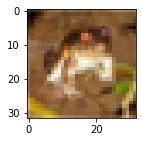

In [11]:
#plotting first image (frog)
plt.figure(figsize=(15,2))
plt.imshow(train_X[0])

In [12]:
#making list of all image classes (0-10)
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [20]:
classes[5]

'dog'

In [21]:
#function for plotting images
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

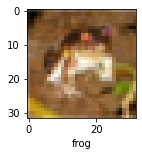

In [24]:
#plotting first image using function
plot_sample(train_X,train_y,0)

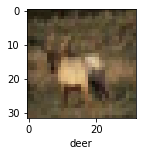

In [27]:
#plotting fourth image using function
plot_sample(train_X,train_y,3)

In [28]:
#values of first image
train_X[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [29]:
#scaled values of first image
train_X[0]/255

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

## Scaling 

In [30]:
train_X=train_X/255
test_X=test_X/255

## Building a ANN model

Because we have direct value of category (truck=1,frog=0 etc.) we use sparse categorical crossentropy. If we had an vertical encoding array(0,1,0,0,0,0,0,0,0,0,0) of target we would use categorical crossentropy. 

In [32]:
#model with two deep layers
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'), 
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='sigmoid') # 10 category for 10 classes we have   
    ])
#compile mode
ann.compile(optimizer='SGD', #stohastic gradient descent
              loss='sparse_categorical_crossentropy',  
              metrics=['accuracy'])
#fitting model
ann.fit(train_X, train_y, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 120s 76ms/step - loss: 1.8605 - accuracy: 0.3345
Epoch 2/5
1563/1563 [==============================] - 120s 77ms/step - loss: 1.6616 - accuracy: 0.4105
Epoch 3/5
1563/1563 [==============================] - 113s 72ms/step - loss: 1.5710 - accuracy: 0.4436
Epoch 4/5
1563/1563 [==============================] - 115s 73ms/step - loss: 1.5081 - accuracy: 0.4659
Epoch 5/5
1563/1563 [==============================] - 110s 71ms/step - loss: 1.4577 - accuracy: 0.4860


In [33]:
ann.evaluate(test_X,test_y)

313/313 [==============================] - 10s 32ms/step - loss: 1.4373 - accuracy: 0.4915


[1.4372761249542236, 0.49149999022483826]

We can see that ANN model perform pretty bad. Only 48.60% accuracy in 5 epochs.

## Classification

In [34]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
pred_y = ann.predict(test_X)
pred_classes_y = [np.argmax(element) for element in pred_y]

print("Classification Report: \n", classification_report(test_y, pred_classes_y))

Classification Report: 
               precision    recall  f1-score   support

           0       0.59      0.50      0.54      1000
           1       0.63      0.56      0.59      1000
           2       0.33      0.46      0.38      1000
           3       0.42      0.20      0.27      1000
           4       0.46      0.37      0.41      1000
           5       0.40      0.43      0.42      1000
           6       0.50      0.54      0.52      1000
           7       0.57      0.56      0.56      1000
           8       0.55      0.69      0.61      1000
           9       0.50      0.61      0.55      1000

    accuracy                           0.49     10000
   macro avg       0.50      0.49      0.49     10000
weighted avg       0.50      0.49      0.49     10000



We can see that for example 9 which is truck we have precision od 50%,recall 61% and f1_score 55%.

## Building CNN model

In [37]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),# convolutional layer(detecting features)
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax') #softmax normalize values (output1:0.32, output2:0.23 > softmax > 0.32/(0.32+0.23))
])

In [38]:
#compile model
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [39]:
#fitting model
cnn.fit(train_X, train_y, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 72s 46ms/step - loss: 1.5176 - accuracy: 0.4533
Epoch 2/10
1563/1563 [==============================] - 68s 44ms/step - loss: 1.1935 - accuracy: 0.5809
Epoch 3/10
1563/1563 [==============================] - 68s 44ms/step - loss: 1.0579 - accuracy: 0.6306
Epoch 4/10
1563/1563 [==============================] - 69s 44ms/step - loss: 0.9816 - accuracy: 0.6571
Epoch 5/10
1563/1563 [==============================] - 69s 44ms/step - loss: 0.9231 - accuracy: 0.6781
Epoch 6/10
1563/1563 [==============================] - 69s 44ms/step - loss: 0.8714 - accuracy: 0.6986
Epoch 7/10
1563/1563 [==============================] - 69s 44ms/step - loss: 0.8302 - accuracy: 0.7103
Epoch 8/10
1563/1563 [==============================] - 69s 44ms/step - loss: 0.7931 - accuracy: 0.7253
Epoch 9/10
1563/1563 [==============================] - 70s 45ms/step - loss: 0.7586 - accuracy: 0.7344
Epoch 10/10
1563/1563 [==============================] - 73s 47m

In [42]:
cnn.evaluate(test_X,test_y)

313/313 [==============================] - 3s 10ms/step - loss: 0.9598 - accuracy: 0.6758


[0.9597523212432861, 0.6758000254631042]

We can see that we've got 67.81% accuracy in 5 epoch using cnn and accuracy of our model is 67.58%.

In [43]:
#reshaping 
test_y=test_y.reshape(-1,)
test_y[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

### Predicting 

In [50]:
#predicted values
predict_y=cnn.predict(test_X)
predict_y[:5]

array([[1.7754354e-03, 2.5477126e-05, 5.3182136e-02, 7.8283173e-01,
        9.8027091e-04, 1.2286238e-01, 3.7067022e-02, 3.4196395e-04,
        9.1736641e-04, 1.6297381e-05],
       [3.9145914e-01, 3.2739822e-02, 1.4811716e-03, 1.3112238e-05,
        3.8505921e-05, 5.7348654e-08, 6.2803730e-07, 6.3854509e-06,
        5.7317501e-01, 1.0861318e-03],
       [1.6352190e-01, 3.0168846e-01, 3.8120733e-03, 4.6245316e-03,
        5.4734284e-03, 6.7949339e-05, 7.9237609e-05, 9.7164849e-04,
        5.0555158e-01, 1.4209281e-02],
       [9.0673697e-01, 1.9062264e-04, 3.3217989e-02, 2.2742697e-03,
        1.5850423e-02, 7.2297022e-05, 1.3895622e-04, 2.5458113e-04,
        4.1255988e-02, 7.8518233e-06],
       [6.5323161e-06, 2.8012937e-05, 9.5532285e-03, 8.7234266e-03,
        8.1503111e-01, 2.7597819e-03, 1.6380814e-01, 1.3335375e-05,
        7.4139782e-05, 2.3600624e-06]], dtype=float32)

In [52]:
#index of maximum values of element
classes_y=[np.argmax(element) for element in predict_y]
classes_y[:5]

[3, 8, 8, 0, 4]

In [54]:
test_y[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

We can see that first four classes our model predicted good and the fifth our model predicted 4 and the truth value is 6.

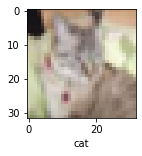

In [56]:
#plotting image
plot_sample(test_X,test_y,8)

In [57]:
#predicting image
classes[classes_y[8]]

'cat'

We've got correct prediction.

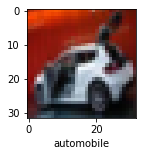

In [58]:
#plotting image
plot_sample(test_X,test_y,6)

In [59]:
#predicting image
classes[classes_y[6]]

'truck'

Here we've got incorrect prediction.

In [62]:
#classification
print("Classification Report: \n", classification_report(test_y, classes_y))

Classification Report: 
               precision    recall  f1-score   support

           0       0.64      0.80      0.71      1000
           1       0.81      0.79      0.80      1000
           2       0.47      0.68      0.56      1000
           3       0.57      0.38      0.46      1000
           4       0.72      0.49      0.58      1000
           5       0.56      0.65      0.60      1000
           6       0.70      0.81      0.75      1000
           7       0.79      0.69      0.74      1000
           8       0.83      0.71      0.77      1000
           9       0.81      0.75      0.78      1000

    accuracy                           0.68     10000
   macro avg       0.69      0.68      0.67     10000
weighted avg       0.69      0.68      0.67     10000



If we comapre ANN model and CNN we can see that with CNN we've got much better result. For example in ANN for 9 (truck) we have f1-score 55% and with CNN we have 78%.